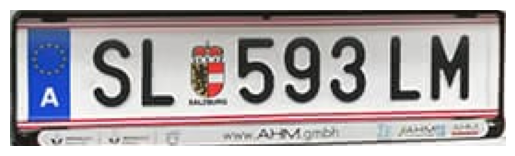

ภาพป้ายทะเบียนที่ถูกตัดออกมาถูกบันทึกแล้ว: cropped_plate.png


In [4]:
import cv2
from matplotlib import pyplot as plt

# โหลดรูปภาพ
image_path = 'lp.jpg'
image = cv2.imread(image_path)

# แปลงภาพเป็นขาวดำ
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ใช้ GaussianBlur เพื่อลด Noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# ใช้ Canny Edge Detection เพื่อหา edges ของป้ายทะเบียน
edged = cv2.Canny(blurred, 30, 200)

# ค้นหา contours ในภาพ
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# ตรวจจับ contour ที่น่าจะเป็นป้ายทะเบียน
plate_contour = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.018 * cv2.arcLength(contour, True), True)
    if len(approx) == 4:
        plate_contour = approx
        break

# ตัดเฉพาะส่วนของป้ายทะเบียน
if plate_contour is not None:
    x, y, w, h = cv2.boundingRect(plate_contour)
    plate_image = image[y:y + h, x:x + w]
    
    # แสดงภาพของป้ายทะเบียนที่ถูกตัดออกมา
    plt.imshow(cv2.cvtColor(plate_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # บันทึกภาพที่ตัดออกมา
    output_path = 'cropped_plate.png'
    cv2.imwrite(output_path, plate_image)
    print("ภาพป้ายทะเบียนที่ถูกตัดออกมาถูกบันทึกแล้ว:", output_path)
else:
    print("ไม่พบป้ายทะเบียนในภาพ.")


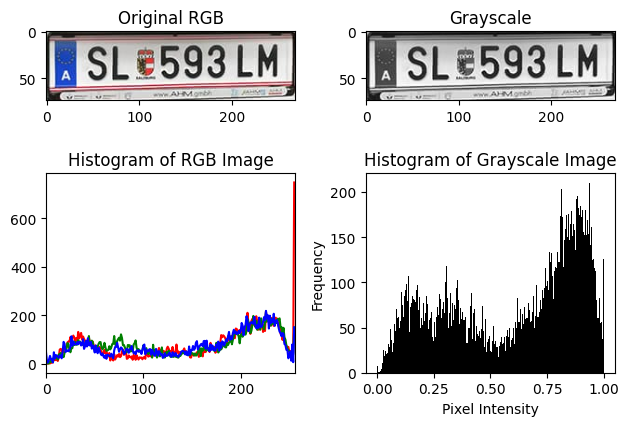

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import cv2
from skimage import io, color, img_as_float, img_as_ubyte, exposure, filters
from scipy.ndimage import convolve
# อ่านภาพในโหมดสี (Color)
imgOg = cv2.imread('cropped_plate.png')
img = imgOg
# img_color = io.imread('s-l1600.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # เปลี่ยนจาก BGR เป็น RGB

# แปลงจาก RGB เป็นสีเทา (Grayscale)
img_gray = color.rgb2gray(img_rgb)

# แสดงผลลัพธ์ภาพ
plt.subplot(2, 2, 1), plt.imshow(img_rgb), plt.title('Original RGB')
plt.subplot(2, 2, 2), plt.imshow(img_gray, cmap='gray'), plt.title('Grayscale')

# สร้างและแสดง Histogram ของภาพต้นฉบับ (RGB)
plt.subplot(2, 2, 3)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram of RGB Image')

# สร้างและแสดง Histogram ของภาพสีเทา
plt.subplot(2, 2, 4)
plt.hist(img_gray.ravel(), bins=256, range=[0, 1], color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()